# Email Spam Classification

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [66]:
data = pd.read_csv('emails.csv')

In [67]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [68]:
data.shape

(5172, 3002)

In [69]:
data['a'].max()

1898

In [70]:
data.isnull().values.any()

False

<AxesSubplot:xlabel='Prediction', ylabel='count'>

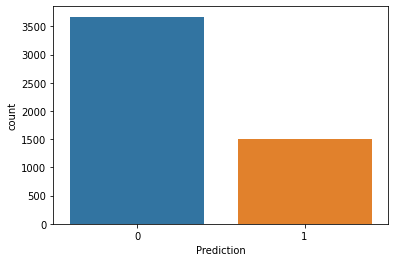

In [71]:
sns.countplot(x = 'Prediction', data = data)

Most of the mails are not spam

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.4+ MB


In [73]:
#Seperating the dependant and independent variable
x = data.drop('Prediction', axis =1).values
y = data.Prediction.values

In [74]:
x = data.drop(['Prediction', 'Email No.'], axis = 1).values

In [75]:
#splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [76]:
#Normalising the values used for training the models
from sklearn.preprocessing import Normalizer
nn = Normalizer()
x_train = nn.fit_transform(x_train)
x_test = nn.transform(x_test)

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [78]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

In [79]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [80]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(x_train, y_train)

GaussianNB()

In [81]:
def report(model):
    pred = model.predict(x_test)
    print(classification_report(pred, y_test))
    plot_confusion_matrix(model, x_test, y_test)
    accuracy_score(pred, y_test)

Random Forest Model report 

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1107
           1       0.95      0.97      0.96       445

    accuracy                           0.97      1552
   macro avg       0.97      0.97      0.97      1552
weighted avg       0.97      0.97      0.97      1552



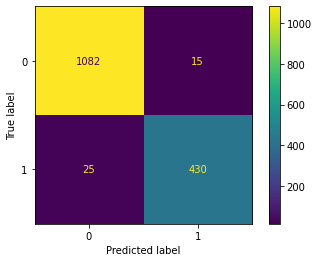

In [82]:
print("Random Forest Model report \n")
report(rf)

Logistics Regresion Model report 

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1229
           1       0.63      0.89      0.74       323

    accuracy                           0.87      1552
   macro avg       0.80      0.88      0.83      1552
weighted avg       0.90      0.87      0.88      1552



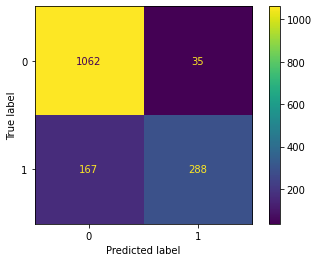

In [83]:
print("Logistics Regresion Model report \n")
report(lr)

GaussianNB Model report 

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1127
           1       0.90      0.96      0.93       425

    accuracy                           0.96      1552
   macro avg       0.94      0.96      0.95      1552
weighted avg       0.96      0.96      0.96      1552



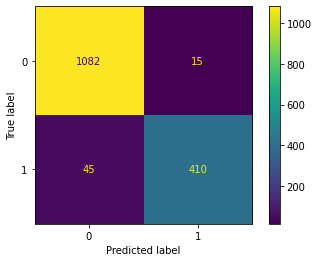

In [84]:
print("GaussianNB Model report \n")
report(gb)

From the above three trained model, Random Forest performed best